In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
la = pd.read_csv("../data_collection/Los Angeles_restaurant.csv")
sd = pd.read_csv("../data_collection/San Diego_restaurant.csv")
sf = pd.read_csv("../data_collection/San Francisco_restaurant.csv")
oc = pd.read_csv("../data_collection/Orange County_restaurant.csv")

In [3]:
df = pd.concat([la,sd,oc,sf])

In [4]:
df.shape 

(54090, 5)

## Data Cleaning, Wrangling and Prepping

In [5]:
df['rating'] = df['rating']/10  # Convert ratings from 50 base to 5 base


In [6]:
url = df[df['restaurant'].str.contains('http')]['restaurant']

In [7]:
url[0]

'https://www.tripadvisor.com/Restaurant_Review-g32513-d800200-Reviews-In_N_Out_Burger-Huntington_Beach_California.html'

In [8]:
clean = url.str.split('Reviews').str[1].str.split('-').str[-2].str.rstrip().str.replace('_',' ')

In [9]:
def clean_name(col):
    if 'http' in col:
        col = col.split('Reviews')[1]
        col = col.split('-')[-2]
        col = col.replace('_',' ')
        return col
    else:
        return col
   

In [10]:
df['restaurant'] = df['restaurant'].apply(lambda x: clean_name(x))
df['restaurant'] = df['restaurant'].apply(lambda x: 'In-N-Out Burger' if 'In N Out' in x else x)

## Exploratory Data Analysis

### 1) Numerical Data 

**Descriptive Statistics on Rating Across all restaurants**

In [11]:
df['rating'].describe()

count    54090.000000
mean         4.229987
std          0.984234
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [12]:
df['restaurant'].value_counts().describe()

count     834.000000
mean       64.856115
std       250.582224
min         1.000000
25%         9.000000
50%        18.000000
75%        44.000000
max      6099.000000
Name: restaurant, dtype: float64

In [13]:
df['restaurant'].value_counts()

In-N-Out Burger             6099
Super Duper Burgers         1493
Burger Lounge               1369
Pink s Hot Dogs             1155
The Taco Stand              1136
                            ... 
McDonald's - Nmcsd             1
Randys Donuts                  1
Melrose Place Sandwiches       1
Yogurtland                     1
Batterfish Truck               1
Name: restaurant, Length: 834, dtype: int64

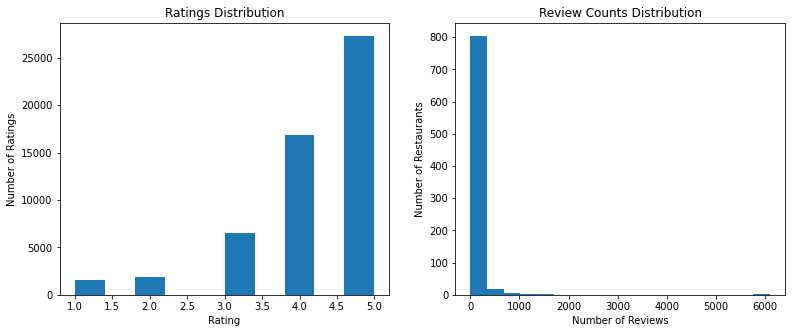

In [14]:

review_counts = df['restaurant'].value_counts()


fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(13,5))
axes[0].hist(df['rating'])
axes[0].set_title('Ratings Distribution')
axes[0].set_ylabel('Number of Ratings')
axes[0].set_xlabel('Rating')

axes[1].hist(review_counts, bins=18)
axes[1].set_title('Review Counts Distribution')
axes[1].set_ylabel('Number of Restaurants')
axes[1].set_xlabel('Number of Reviews')


plt.show()

- Ratings are skewed to the left. The avverage review is 4.23 despite the max being a 5. The media being a 5 indicates that, at least 50 percent of reviews are 5 stars. 
- More majority of the reviews are held by the popular restuaurants. This is evident when looking at the mean and the 75 percentile. The average amount of revieews per restuarant is 64.86 while the 75th percentile is only 44.

### 2) Categorical Plots 

In [15]:
avg_rating_restaurant = df.groupby('restaurant')['rating'].mean()
top_by_count = df['restaurant'].value_counts().head(20)

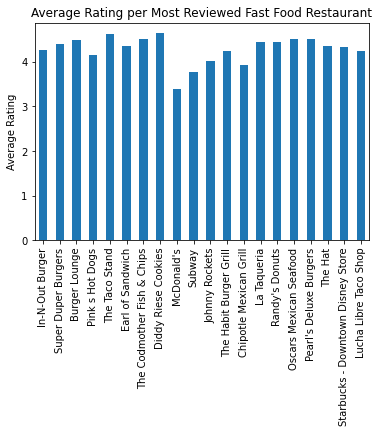

In [16]:
avg_rating_restaurant[top_by_count.index].plot.bar()
plt.title('Average Rating per Most Reviewed Fast Food Restaurant')
plt.ylabel('Average Rating')
plt.show()

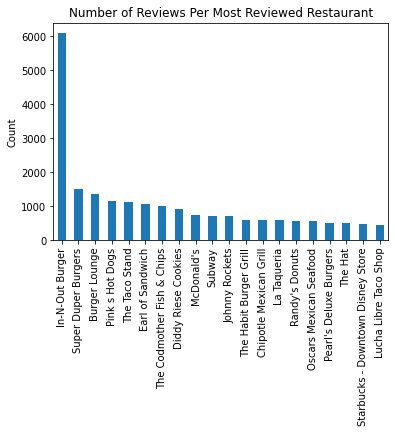

In [17]:
top_by_count.plot.bar()
plt.title('Number of Reviews Per Most Reviewed Restaurant')
plt.ylabel('Count')
plt.show()